## Beijing Multi-Site Air-Quality Data Data Set
#### Janardan Devkota

#### 1. Load the dataset, PRSA_Data.csv, into memory.

In [1]:
# Import Libraies
import os
import glob
import pandas as pd
###########################
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
###############################

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [2]:
# # Change the working directory/specifying the directory for data
# os.chdir("/Volumes/JD/Programming Working Directory/Deep Learning/Week 2/PRSA_Data_20130301-20170228")

# # Use glob to match the pattern ‘csv’
# extension = 'csv'
# all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

# # Combine all files in the list and export as CSV
# combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
# #export to csv
# combined_csv.to_csv( "PRSA_Data.csv", index=False, encoding='utf-8-sig')

In [3]:
PRSA_Data = pd.read_csv('/Volumes/JD/Programming Working Directory/Deep Learning/Week 2/PRSA_Data_20130301-20170228/PRSA_Data-Copy1.csv', sep = ',')
PRSA_Data.head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


In [4]:
PRSA_Data.shape

(420768, 18)

#### 2. Clean the data and check missing values for this dataset.

In [5]:
# Checking the details of the data once 
PRSA_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [6]:
import numpy as np
# Check for null values
features_with_na = [features for features in PRSA_Data.columns if PRSA_Data[features].isnull().sum() > 1]
for feature in features_with_na:
    print(feature, np.round(PRSA_Data[feature].isnull().mean(), 4), ' % missing values')

PM2.5 0.0208  % missing values
PM10 0.0153  % missing values
SO2 0.0214  % missing values
NO2 0.0288  % missing values
CO 0.0492  % missing values
O3 0.0316  % missing values
TEMP 0.0009  % missing values
PRES 0.0009  % missing values
DEWP 0.001  % missing values
RAIN 0.0009  % missing values
wd 0.0043  % missing values
WSPM 0.0008  % missing values


In [7]:
import datetime
PRSA_Data.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [8]:
#droping / imputing missing values
PRSA_Data['PM2.5'].fillna(PRSA_Data['PM2.5'].median(), inplace = True)
PRSA_Data['PM10'].fillna(PRSA_Data['PM10'].median(), inplace = True)
PRSA_Data['SO2'].fillna(PRSA_Data['SO2'].median(), inplace = True)
PRSA_Data['NO2'].fillna(PRSA_Data['NO2'].mean(), inplace = True)
PRSA_Data['CO'].fillna(PRSA_Data['CO'].median(), inplace = True)
PRSA_Data['O3'].fillna(PRSA_Data['O3'].median(), inplace = True)
PRSA_Data['TEMP'].fillna(PRSA_Data['TEMP'].median(), inplace = True)
PRSA_Data['PRES'].fillna(PRSA_Data['PRES'].median(), inplace = True)
PRSA_Data['DEWP'].fillna(PRSA_Data['DEWP'].median(), inplace = True)
PRSA_Data['RAIN'].fillna(PRSA_Data['RAIN'].median(), inplace = True)
PRSA_Data['WSPM'].fillna(PRSA_Data['WSPM'].median(), inplace = True)
PRSA_Data.dropna(subset = ['wd'], inplace = True)
PRSA_Data.drop(['No'], axis = 1, inplace = True)
PRSA_Data.shape

(418946, 17)

In [9]:
# Down size the data set to 10 percentages
PRSA_Data = PRSA_Data.sample(frac = 0.1, random_state = 101)
PRSA_Data.shape

(41895, 17)

In [10]:
# # Drop all rows with atleast one NAN
# PRSA_Data_clean = PRSA_Data.dropna() 
# # Check for null values
# features_with_na1 = [features for features in PRSA_Data_clean.columns if PRSA_Data_clean[features].isnull().sum() > 1]
# for feature in features_with_na:
#     print(feature, np.round(PRSA_Data_clean[feature].isnull().mean(), 4), ' % missing values')
    
# # Checking the details of the data once 
# PRSA_Data_clean.shape

In [11]:
PRSA_Data.columns

Index(['year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO',
       'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

In [12]:
PRSA_Data.isnull().sum()

year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

#### 3. Convert all categorical variables to numerical values.

In [13]:
PRSA_Data.head(5)

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
141455,2013,4,19,23,52.0,45.0,5.0,39.0,600.0,34.0,3.8,1018.1,1.7,0.0,WSW,2.2,Guanyuan
403930,2015,3,30,10,153.0,345.0,56.0,66.0,1900.0,44.0,16.4,1007.1,4.7,0.0,S,2.7,Shunyi
408420,2015,10,3,12,26.0,75.0,6.0,28.0,800.0,61.0,22.5,1017.9,5.4,0.0,SSW,2.2,Shunyi
379062,2016,5,28,6,74.0,105.0,7.0,28.0,900.0,55.0,15.7,998.6,10.7,0.0,NNW,1.0,Dingling
280337,2017,2,21,17,25.0,57.0,2.0,41.0,900.0,45.0,-1.4,1023.2,-5.6,0.0,ESE,2.3,Dongsi


In [14]:
# Summarize the unique values for all the categorical features/variables.
catFeatures = ['wd', 'station']
factors = pd.get_dummies(PRSA_Data[catFeatures],drop_first = True)
factors.head()

,wd_ENE,wd_ESE,wd_N,wd_NE,wd_NNE,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,...,station_Dingling,station_Dongsi,station_Guanyuan,station_Gucheng,station_Huairou,station_Nongzhanguan,station_Shunyi,station_Tiantan,station_Wanliu,station_Wanshouxigong
141455,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
403930,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
408420,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
379062,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
280337,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [15]:
# Drop the original categorical variables, then concatenate the numerical features and dummy variables.
PRSA_Data = PRSA_Data.drop(catFeatures, axis = 1)
PRSA_Data = pd.concat([PRSA_Data,factors], axis = 1)
PRSA_Data.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,...,station_Dingling,station_Dongsi,station_Guanyuan,station_Gucheng,station_Huairou,station_Nongzhanguan,station_Shunyi,station_Tiantan,station_Wanliu,station_Wanshouxigong
141455,2013,4,19,23,52.0,45.0,5.0,39.0,600.0,34.0,...,0,0,1,0,0,0,0,0,0,0
403930,2015,3,30,10,153.0,345.0,56.0,66.0,1900.0,44.0,...,0,0,0,0,0,0,1,0,0,0
408420,2015,10,3,12,26.0,75.0,6.0,28.0,800.0,61.0,...,0,0,0,0,0,0,1,0,0,0
379062,2016,5,28,6,74.0,105.0,7.0,28.0,900.0,55.0,...,1,0,0,0,0,0,0,0,0,0
280337,2017,2,21,17,25.0,57.0,2.0,41.0,900.0,45.0,...,0,1,0,0,0,0,0,0,0,0


In [16]:
# Print the column names
PRSA_Data.columns

Index(['year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO',
       'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'wd_ENE', 'wd_ESE',
       'wd_N', 'wd_NE', 'wd_NNE', 'wd_NNW', 'wd_NW', 'wd_S', 'wd_SE', 'wd_SSE',
       'wd_SSW', 'wd_SW', 'wd_W', 'wd_WNW', 'wd_WSW', 'station_Changping',
       'station_Dingling', 'station_Dongsi', 'station_Guanyuan',
       'station_Gucheng', 'station_Huairou', 'station_Nongzhanguan',
       'station_Shunyi', 'station_Tiantan', 'station_Wanliu',
       'station_Wanshouxigong'],
      dtype='object')

#### 4. Perform feature engineering on the date feature.

In [17]:
# Numerically Summarize the Data
nymerics_var = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
np.round(PRSA_Data[nymerics_var].describe(),decimals = 2)

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,41895.00,41895.00,41895.00,41895.00,41895.00,41895.00,41895.00,41895.00,41895.0,41895.00,41895.00
mean,78.82,104.17,15.66,50.66,1204.08,57.07,13.62,1010.68,2.5,0.06,1.74
std,79.46,90.52,21.55,34.71,1116.40,55.78,11.42,10.50,13.8,0.81,1.25
min,2.00,2.00,0.29,1.03,100.00,0.21,-16.20,982.40,-34.9,0.00,0.00
25%,21.00,36.00,3.00,24.00,500.00,12.00,3.20,1002.20,-8.9,0.00,0.90
50%,55.00,82.00,7.00,44.00,900.00,45.00,14.60,1010.20,3.1,0.00,1.40
75%,109.00,144.00,19.00,70.00,1500.00,80.00,23.30,1019.00,15.1,0.00,2.20
max,882.00,914.00,310.00,290.00,10000.00,1071.00,40.60,1042.00,28.8,47.70,10.90


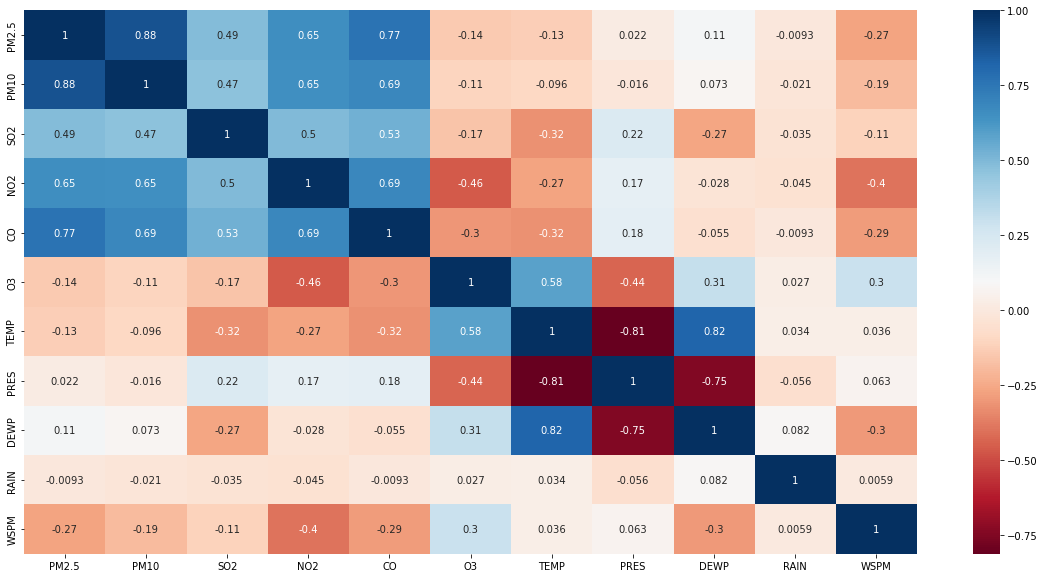

In [18]:
# Let's summarize the correlation between all these numerical features data graphically using the heat map
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20,10))
corr = PRSA_Data[nymerics_var].corr()
heatmap = sns.heatmap(corr, annot = True, cmap = "RdBu")

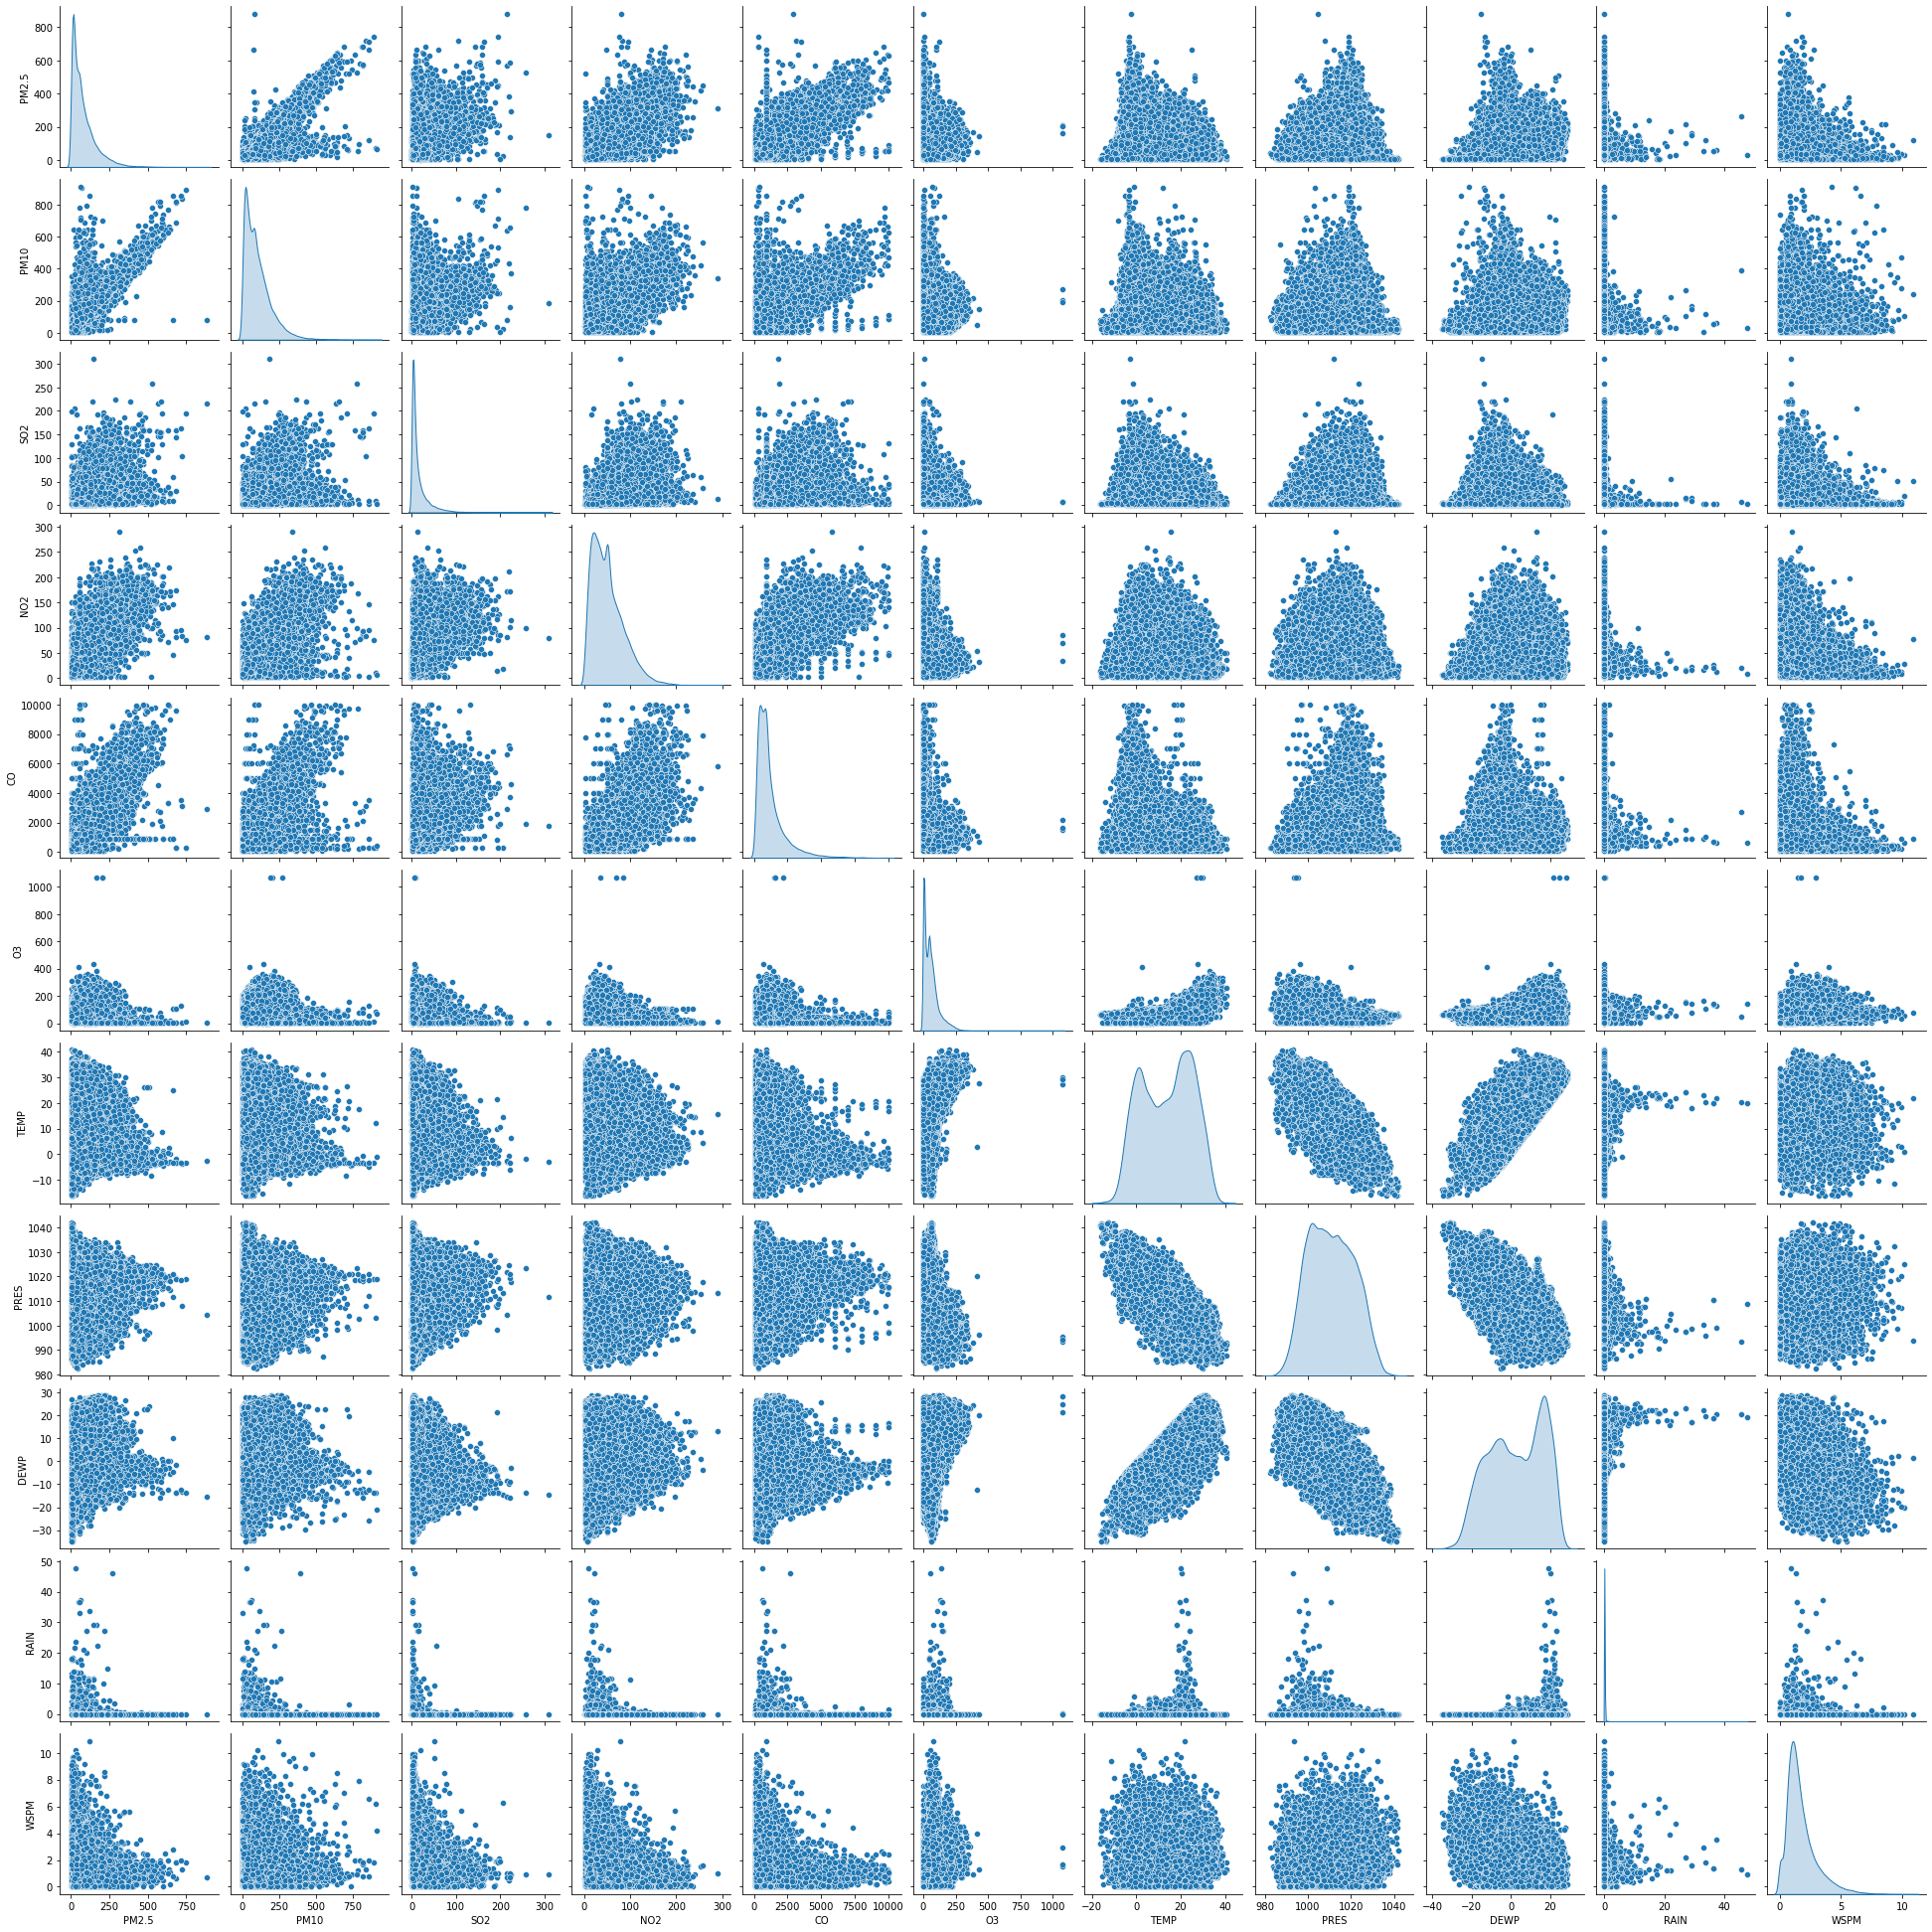

In [19]:
#Lets summarize the numerical features graphically
sns.pairplot(PRSA_Data[nymerics_var], diag_kind = 'kde')

<AxesSubplot:xlabel='hour', ylabel='PM2.5'>

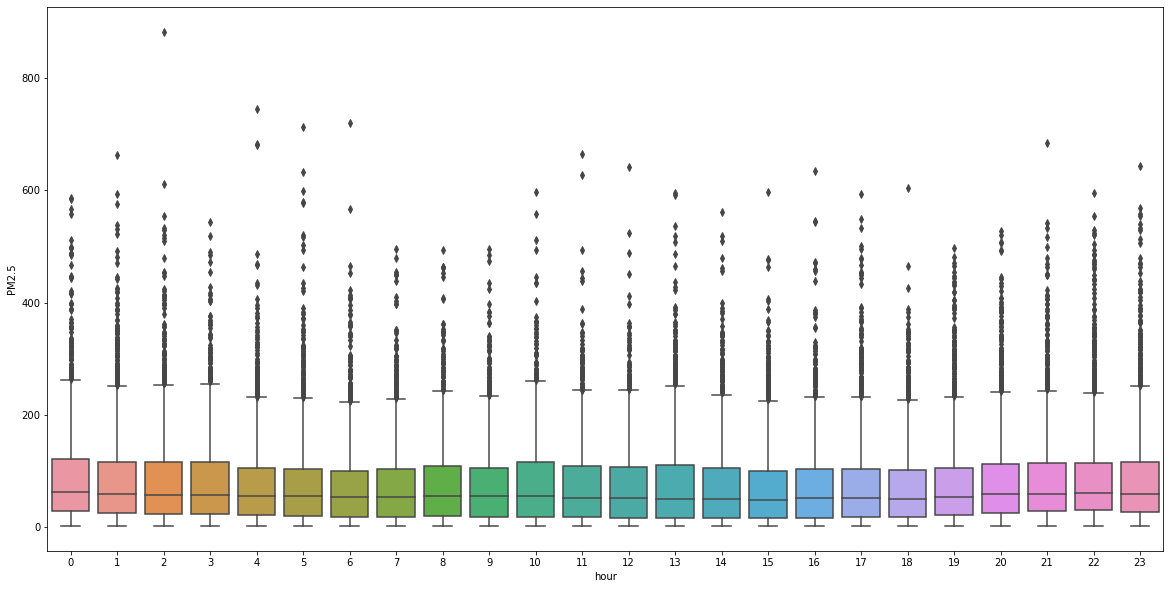

In [20]:
# Let's box plot PM2.5 against the hour.
plt.figure(figsize = (20,10))
sns.boxplot(x = 'hour',y = 'PM2.5', data = PRSA_Data)

<AxesSubplot:xlabel='day', ylabel='PM2.5'>

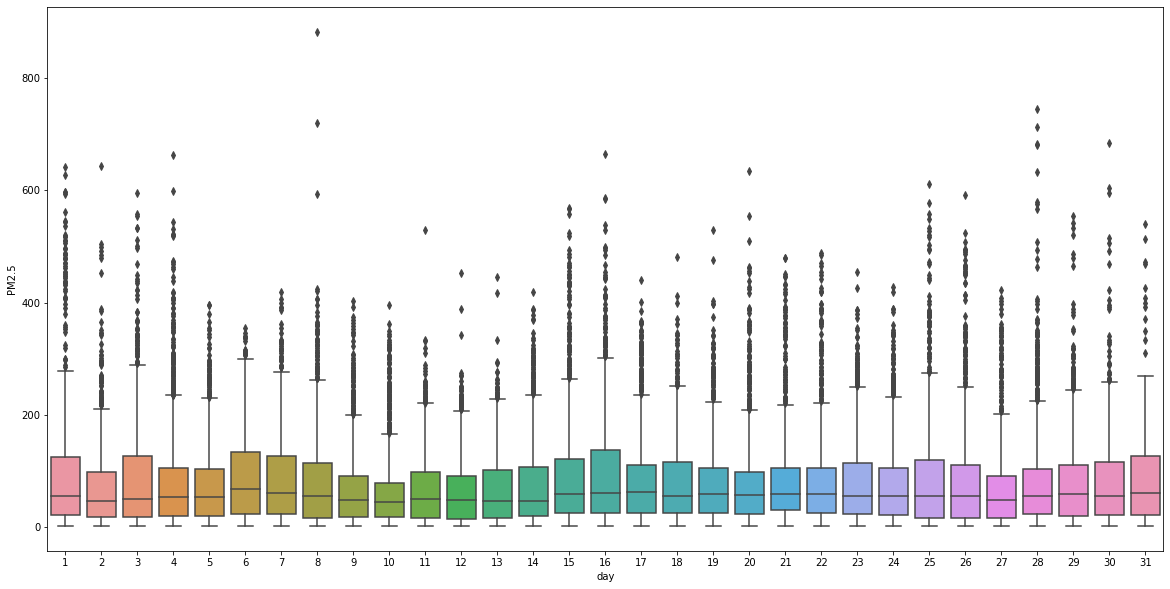

In [21]:
# Let's box plot PM2.5 against the day.
plt.figure(figsize = (20,10))
sns.boxplot(x = 'day',y = 'PM2.5', data = PRSA_Data)

<AxesSubplot:xlabel='month', ylabel='PM2.5'>

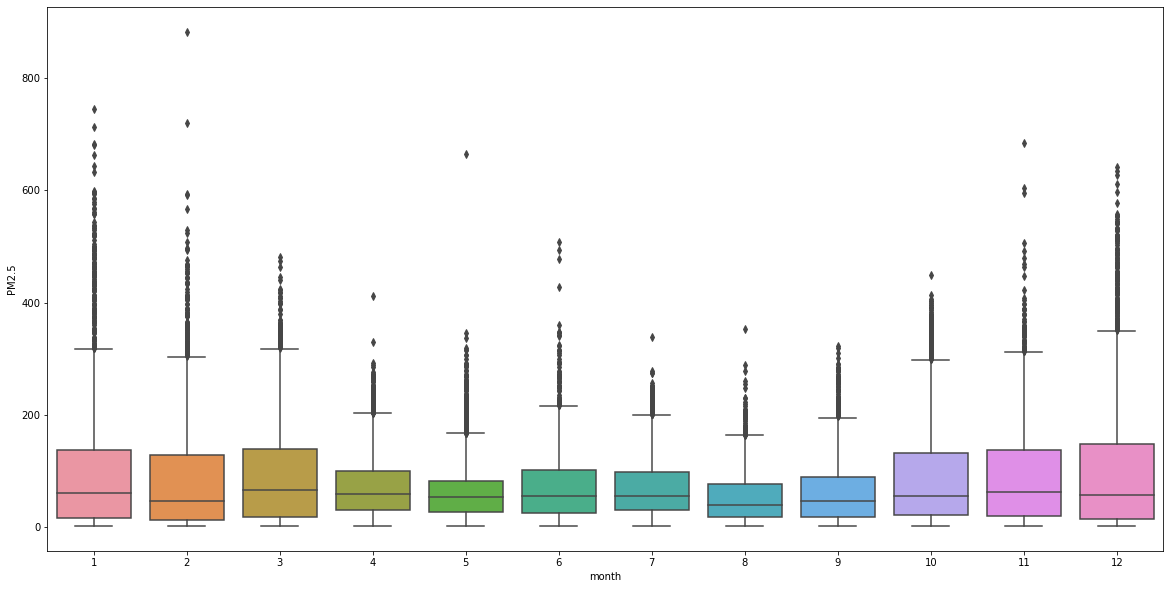

In [22]:
# Let's box plot PM2.5 against the month.
plt.figure(figsize = (20,10))
sns.boxplot(x = 'month',y = 'PM2.5', data = PRSA_Data)

<AxesSubplot:xlabel='year', ylabel='PM2.5'>

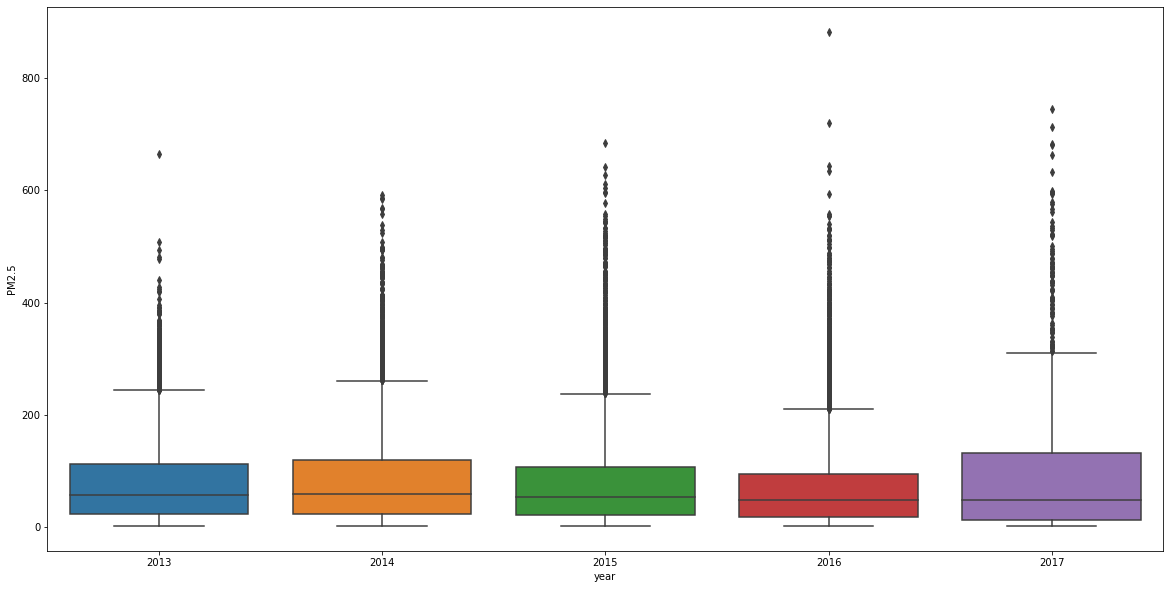

In [23]:
# Let's box plot PM2.5 against the year.
plt.figure(figsize = (20,10))
sns.boxplot(x = 'year',y = 'PM2.5', data = PRSA_Data)

#### 5. Split the data into 80% of training and 20% of the test dataset.

In [24]:
#Obtain features and label
X = PRSA_Data.drop('PM2.5',axis=1)
y = PRSA_Data['PM2.5']

#Split the data into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2021)

#### 6. Preprocess the data using the normalization method to convert all features into the range of [0,1]

In [25]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

In [26]:
# Float features are normalize 
PRSA_Data['PM2.5'] = (PRSA_Data['PM2.5'] - PRSA_Data['PM2.5'].min()) / (PRSA_Data['PM2.5'].max() - PRSA_Data['PM2.5'].min())
PRSA_Data['PM10'] = (PRSA_Data['PM10'] - PRSA_Data['PM10'].min())/(PRSA_Data['PM10'].max() - PRSA_Data['PM10'].min())
PRSA_Data['SO2'] = (PRSA_Data['SO2'] - PRSA_Data['SO2'].min())/(PRSA_Data['SO2'].max() - PRSA_Data['SO2'].min())
PRSA_Data['NO2'] = (PRSA_Data['NO2'] - PRSA_Data['NO2'].min()) / (PRSA_Data['NO2'].max() - PRSA_Data['NO2'].min())
PRSA_Data['CO'] = (PRSA_Data['CO'] - PRSA_Data['CO'].min())/(PRSA_Data['CO'].max() - PRSA_Data['CO'].min())
PRSA_Data['O3'] = (PRSA_Data['O3'] - PRSA_Data['O3'].min())/(PRSA_Data['O3'].max() - PRSA_Data['O3'].min())
PRSA_Data['TEMP'] = (PRSA_Data['TEMP'] - PRSA_Data['TEMP'].min()) / (PRSA_Data['TEMP'].max() - PRSA_Data['TEMP'].min())
PRSA_Data['PRES'] = (PRSA_Data['PRES'] - PRSA_Data['PRES'].min())/(PRSA_Data['PRES'].max() - PRSA_Data['PRES'].min())
PRSA_Data['DEWP'] = (PRSA_Data['DEWP'] - PRSA_Data['DEWP'].min())/(PRSA_Data['DEWP'].max() - PRSA_Data['DEWP'].min())
PRSA_Data['RAIN'] = (PRSA_Data['RAIN'] - PRSA_Data['RAIN'].min()) / (PRSA_Data['RAIN'].max() - PRSA_Data['RAIN'].min())
PRSA_Data['WSPM'] = (PRSA_Data['WSPM'] - PRSA_Data['WSPM'].min())/(PRSA_Data['WSPM'].max() - PRSA_Data['WSPM'].min())
PRSA_Data.head(10).T

,141455,403930,408420,379062,280337,213556,274345,350693,94742,307126
year,2013.000000,2015.000000,2015.000000,2016.000000,2017.000000,2013.000000,2016.000000,2013.000000,2015.000000,2016.000000
month,4.000000,3.000000,10.000000,5.000000,2.000000,7.000000,6.000000,3.000000,12.000000,3.000000
day,19.000000,30.000000,3.000000,28.000000,21.000000,11.000000,17.000000,3.000000,21.000000,13.000000
hour,23.000000,10.000000,12.000000,6.000000,17.000000,4.000000,1.000000,5.000000,14.000000,22.000000
PM2.5,0.056818,0.171591,0.027273,0.081818,0.026136,0.031818,0.045455,0.052273,0.286364,0.039773
PM10,0.047149,0.376096,0.080044,0.112939,0.060307,0.026316,0.131579,0.058114,0.276316,0.082237
SO2,0.015222,0.179890,0.018451,0.021679,0.005535,0.007377,0.015222,0.060425,0.134687,0.073340
NO2,0.131408,0.224842,0.093342,0.093342,0.138329,0.152035,0.259448,0.224842,0.557053,0.204079
CO,0.050505,0.181818,0.070707,0.080808,0.080808,0.040404,0.060606,0.101010,0.434343,0.060606
O3,0.031552,0.040891,0.056767,0.051164,0.041825,0.001668,0.032486,0.002602,0.004469,0.027817


In [27]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

### Create the Model

In [28]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [29]:
X_train = torch.tensor(X_train.astype(np.float32))
y_train = torch.tensor(y_train.values.astype(np.float32).reshape(-1,1))

In [30]:
X_train.shape

torch.Size([33516, 40])

In [31]:
y_train.shape

torch.Size([33516, 1])

In [32]:
input_size = X_train.shape[1]
output_size = y_train.shape[1]
#specify the number of neuron for the first layer
hidden_size = [2, 20, 10]
print(input_size)
print(output_size)

#convert numpy to tensor from_numpy
X_test = torch.from_numpy(X_test.astype(np.float32))


40
1


In [33]:
# define the child module class derivated from parent class of torch.nn.Module)
class LinearRegressionModel(torch.nn.Module):
    #define the constructor
    def __init__(self, input_size,  hidden_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.hidden1 = torch.nn.Linear(input_size, hidden_size[0]) 
        self.hidden2 = torch.nn.Linear(hidden_size[0], hidden_size[1]) 
        self.hidden3 = torch.nn.Linear(hidden_size[1], hidden_size[2]) 
        self.predict = torch.nn.Linear(hidden_size[2], output_size)  
    #overife the forward function in this child class
    def forward(self, x):
        x = F.relu(self.hidden1(x))  
        x = F.relu(self.hidden2(x))
        x = F.relu(self.hidden3(x))
        y_pred = self.predict(x)            
        return y_pred

In [34]:
model = LinearRegressionModel(input_size, hidden_size,  output_size)

In [35]:
l = nn.MSELoss()

In [36]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.05)

In [37]:
%%time
from sklearn.metrics import mean_squared_error
#fix the random seeds for troch and np
torch.manual_seed(1)
np.random.seed(0)


#set the number of epochs

num_epochs = 100

train_loss = [None]*num_epochs
valadition_loss = [None]*num_epochs
for epoch in range(num_epochs):
    #forward pass
    y_pred = model(X_train.requires_grad_())

    #calculate the loss
    loss= l(y_pred, y_train)
    #Set the gradients to be zero
    optimizer.zero_grad()
    
    #backward pass: calculate gradients
    loss.backward()

    #update the weights
    optimizer.step()
        
    #Stop tracking the gradient by calling detach since we don't use it anymore
    y_pred = model(X_test).detach().numpy()
    val_loss = mean_squared_error(y_test,y_pred)
    train_loss[epoch] = loss.item()
    valadition_loss[epoch] = val_loss
    if epoch % 10 == 0:
        print('epoch {0}, loss = {1:.4f} and val_loss = {2:.4f}'.format(epoch, loss.item(), val_loss))

epoch 0, loss = 12582.9414 and val_loss = 12233.3312
epoch 10, loss = 10526.8096 and val_loss = 9779.2197
epoch 20, loss = 6425.6021 and val_loss = 6361.6014
epoch 30, loss = 6376.0322 and val_loss = 6089.9475
epoch 40, loss = 6500.4097 and val_loss = 6166.1957
epoch 50, loss = 6431.8022 and val_loss = 6134.1256
epoch 60, loss = 6386.7988 and val_loss = 6098.0854
epoch 70, loss = 6374.2788 and val_loss = 6083.9410
epoch 80, loss = 6372.9380 and val_loss = 6081.4374
epoch 90, loss = 6372.9028 and val_loss = 6080.9907
CPU times: user 1.39 s, sys: 43.6 ms, total: 1.43 s
Wall time: 1.14 s


In [38]:
#Convert the train and validation loss to a df
trainhist = pd.DataFrame({'train_loss': train_loss, 'val_loss': valadition_loss, 'epoch':np.arange(num_epochs)})
#Look at the latest performance
np.round(trainhist.tail(),decimals = 2)

,train_loss,val_loss,epoch
95,6373.47,6081.48,95
96,6373.44,6081.37,96
97,6373.31,6081.21,97
98,6373.15,6081.08,98
99,6373.01,6080.99,99


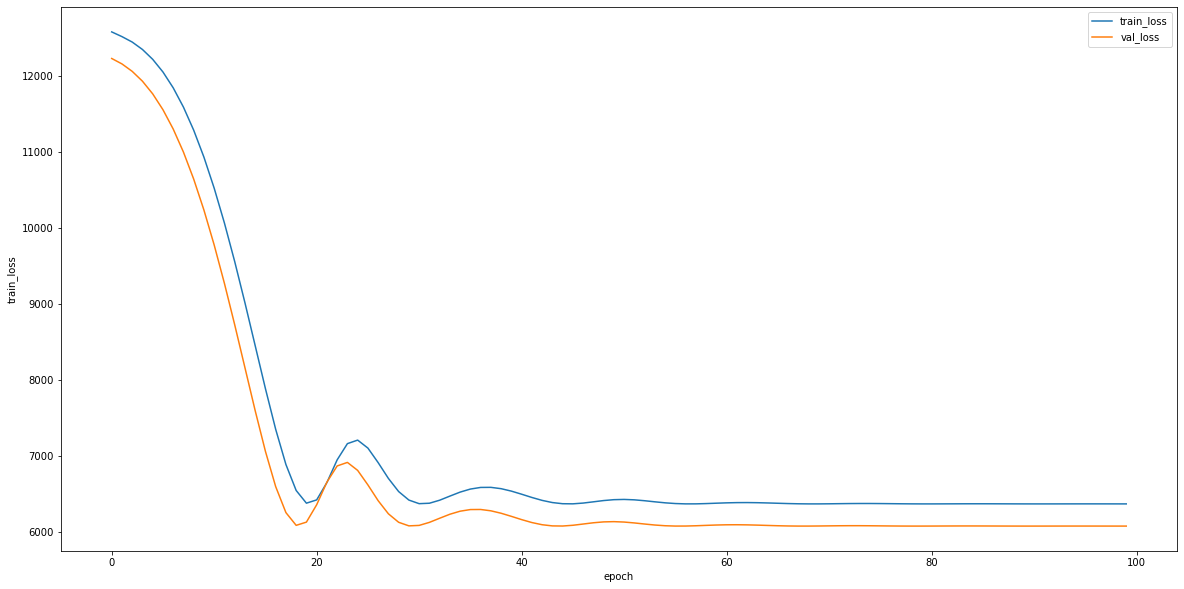

In [39]:
import matplotlib.pyplot as plt
#Plot train loss
plt.figure(figsize = (20,10))
sns.lineplot(x='epoch', y ='train_loss', data =trainhist)
#Plot validation loss
sns.lineplot(x='epoch', y ='val_loss', data =trainhist)
#Add legends
plt.legend(labels=['train_loss', 'val_loss'])

In [40]:
%%time

from sklearn.metrics import mean_squared_error
#fix the random seeds for troch and np
torch.manual_seed(1)
np.random.seed(0)

#convert numpy to tensor from_numpy
#X_test = torch.from_numpy(X_test.astype(np.float32))

#set the number of epochs

num_epochs = 10000

train_loss = [None]*num_epochs
valadition_loss = [None]*num_epochs
for epoch in range(num_epochs):
    #forward pass
    y_pred = model(X_train.requires_grad_())

    #calculate the loss
    loss= l(y_pred, y_train)
    #Set the gradients to be zero
    optimizer.zero_grad()
    
    #backward pass: calculate gradients
    loss.backward()

    #update the weights
    optimizer.step()
        
    #Stop tracking the gradient by calling detach since we don't use it anymore
    y_pred = model(X_test).detach().numpy()
    val_loss = mean_squared_error(y_test,y_pred)
    train_loss[epoch] = loss.item()
    valadition_loss[epoch] = val_loss
    if epoch % 500 == 0:
        print('epoch {0}, loss = {1:.4f} and val_loss = {2:.4f}'.format(epoch, loss.item(), val_loss))

epoch 0, loss = 6372.9121 and val_loss = 6080.9757
epoch 500, loss = 6372.8862 and val_loss = 6080.9744
epoch 1000, loss = 6372.8857 and val_loss = 6080.9744
epoch 1500, loss = 6372.8857 and val_loss = 6080.9744
epoch 2000, loss = 6372.8862 and val_loss = 6080.9744
epoch 2500, loss = 6372.8862 and val_loss = 6080.9744
epoch 3000, loss = 6372.8862 and val_loss = 6080.9744
epoch 3500, loss = 6372.8862 and val_loss = 6080.9744
epoch 4000, loss = 6372.8857 and val_loss = 6080.9744
epoch 4500, loss = 6372.8857 and val_loss = 6080.9744
epoch 5000, loss = 6372.8862 and val_loss = 6080.9744
epoch 5500, loss = 6372.8896 and val_loss = 6080.9762
epoch 6000, loss = 6372.8862 and val_loss = 6080.9744
epoch 6500, loss = 6372.8857 and val_loss = 6080.9744
epoch 7000, loss = 6373.0972 and val_loss = 6081.1433
epoch 7500, loss = 6372.8862 and val_loss = 6080.9744
epoch 8000, loss = 6372.8911 and val_loss = 6080.9750
epoch 8500, loss = 6372.8857 and val_loss = 6080.9744
epoch 9000, loss = 6372.8857 and

In [41]:
#Convert the train and validation loss to a df
trainhist = pd.DataFrame({'train_loss': train_loss, 'val_loss': valadition_loss, 'epoch':np.arange(num_epochs)})
#Look at the latest performance
np.round(trainhist.tail(),decimals = 2)

,train_loss,val_loss,epoch
9995,6372.89,6080.97,9995
9996,6372.89,6080.97,9996
9997,6372.89,6080.97,9997
9998,6372.89,6080.97,9998
9999,6372.89,6080.97,9999


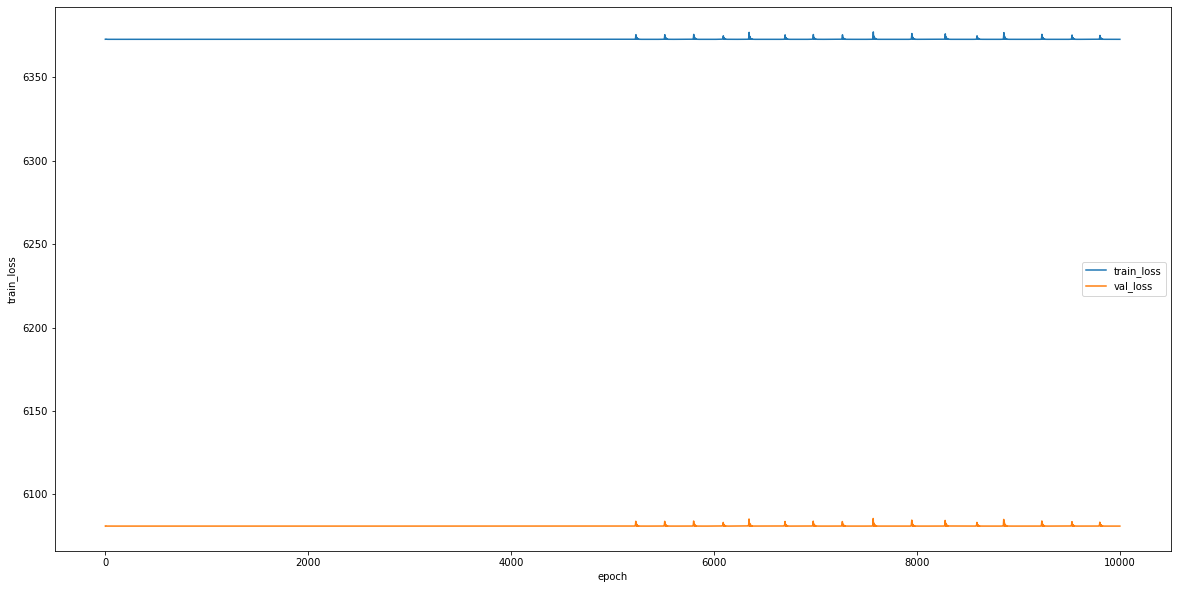

In [42]:
import matplotlib.pyplot as plt
#Plot train loss
plt.figure(figsize = (20,10))
sns.lineplot(x = 'epoch', y = 'train_loss', data = trainhist)
#Plot validation loss
sns.lineplot(x = 'epoch', y = 'val_loss', data = trainhist)
#Add legends
plt.legend(labels = ['train_loss', 'val_loss'])

### Dropout to present Neural Networks from Overfitting

In [43]:
%%time
# define the child module class derivated from parent class of torch.nn.Module)
class LinearRegressionModel(torch.nn.Module):
    #define the constructor
    def __init__(self, input_size,  hidden_size, output_size,droprate):
        super(LinearRegressionModel, self).__init__()
        self.hidden1 = torch.nn.Linear(input_size, hidden_size[0]) 
        self.hiidden1_drop = nn.Dropout(droprate) 
        self.hidden2 = torch.nn.Linear(hidden_size[0], hidden_size[1]) 
        self.hidden3 = torch.nn.Linear(hidden_size[1], hidden_size[2]) 
        self.predict = torch.nn.Linear(hidden_size[2], output_size)  
    #overife the forward function in this child class
    def forward(self, x):
        x = F.relu(self.hiidden1_drop(self.hidden1(x))) 
        x = F.relu(self.hidden2(x))
        x = F.relu(self.hidden3(x))
        y_pred = self.predict(x)            
        return y_pred

# Create a linear regression model
droprate = 0.3
model = LinearRegressionModel(input_size, hidden_size,  output_size, droprate)

# Select the MSE loss
l = nn.MSELoss()

# Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.05)

from sklearn.metrics import mean_squared_error
#fix the random seeds for troch and np
torch.manual_seed(1)
np.random.seed(0)

#convert numpy to tensor from_numpy
#X_test = torch.from_numpy(X_test.astype(np.float32))

#set the number of epochs

num_epochs = 1000

train_loss = [None]*num_epochs
valadition_loss = [None]*num_epochs
for epoch in range(num_epochs):
    #forward pass
    y_pred = model(X_train.requires_grad_())

    #calculate the loss
    loss= l(y_pred, y_train)
    #Set the gradients to be zero
    optimizer.zero_grad()
    
    #backward pass: calculate gradients
    loss.backward()

    #update the weights
    optimizer.step()
        
    #Stop tracking the gradient by calling detach since we don't use it anymore
    y_pred = model(X_test).detach().numpy()
    val_loss = mean_squared_error(y_test,y_pred)
    train_loss[epoch] = loss.item()
    valadition_loss[epoch] = val_loss
    if epoch % 100 == 0:
        print('epoch {0}, loss = {1:.4f} and val_loss = {2:.4f}'.format(epoch, loss.item(), val_loss))

epoch 0, loss = 12545.2988 and val_loss = 12194.7694
epoch 100, loss = 3159.0757 and val_loss = 3383.0877
epoch 200, loss = 2513.1206 and val_loss = 2454.7433
epoch 300, loss = 2653.8838 and val_loss = 2572.2923
epoch 400, loss = 2586.4712 and val_loss = 2537.1710
epoch 500, loss = 2546.9319 and val_loss = 2532.9656
epoch 600, loss = 2583.1274 and val_loss = 2615.1462
epoch 700, loss = 2470.9966 and val_loss = 2659.9987
epoch 800, loss = 2522.6265 and val_loss = 2503.5228
epoch 900, loss = 2537.4497 and val_loss = 2462.3192
CPU times: user 15.9 s, sys: 507 ms, total: 16.4 s
Wall time: 12.8 s


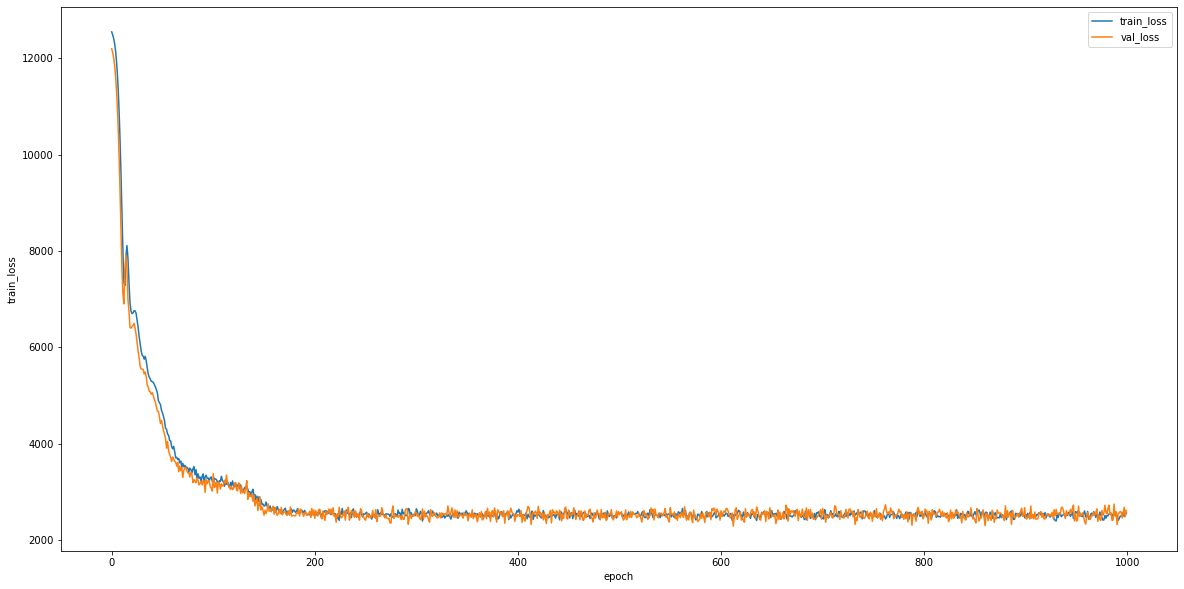

In [44]:
#Convert the train and validation loss to a df
trainhist = pd.DataFrame({'train_loss': train_loss, 'val_loss': valadition_loss, 'epoch':np.arange(num_epochs)})
#Look at the latest performance
trainhist.tail()

import matplotlib.pyplot as plt
#Plot train loss
plt.figure(figsize = (20,10))
sns.lineplot(x='epoch', y ='train_loss', data =trainhist)
#Plot validation loss
sns.lineplot(x='epoch', y ='val_loss', data =trainhist)
#Add legends
plt.legend(labels=['train_loss', 'val_loss'])

In [ ]:
In this there was an issues of the under fitting aboout the epoch is 190 after that there is no issues of over fitting and under fitting. 
Because under fitting is defined as A model can be considered underfit if your validation loss is still decreasing. In this model the train loss cannot observe after epoch 190. 





In [45]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
y_pred = model(X_test).detach().numpy()

In [46]:
#y_pred = model.predict(X_test)
#convert numpy to tensor
#X_test = torch.from_numpy(X_test.astype(np.float32))
#Stop tracking the gradient by calling detach since we don't use it anymore
y_pred = model(X_test).detach().numpy()

In [47]:
'The mean square error is {0:.4f}'.format(mean_squared_error(y_test,y_pred))

'The mean square error is 2495.8690'

In [48]:
'The root of mean square error is {0:.4f}'.format(mean_squared_error(y_test,y_pred,squared = False))

'The root of mean square error is 49.9587'

In [49]:
'The mean absolute error is {0:.4f}'.format(mean_absolute_error(y_test,y_pred))

'The mean absolute error is 30.9538'

#### 9. Build a neuron network with two hidden layers of 20 and 10 neurons to forecast PM2.5 using all other features and PyTorch. Does it overfit or underfit the data? Please justify your answer.